In [292]:
%run GameInterface.ipynb

# other players
%run MCTSPlayer.ipynb

# games
%run TicTacToe.ipynb
%run Connect4.ipynb
%run Connect2.ipynb

In [293]:
## Players ("Red":1, "Blue:-1)
## - HumanPlayer(piece="Red") --> Not working!!
## - RandomPlayer(piece="Red")
## - MiniMaxPlayer(piece="Blue", initial_depth=4)
## - MCTSPlayer(piece=1, rollouts=5, max_rollout=10) --> Working only in connect2 and connect4

In [294]:
## Connect2 example

import time

players = {
    "Red": RandomPlayer(piece="Red"),
    "Blue": MiniMaxPlayer(piece="Blue", initial_depth=4)
}

# players = {
#     "Red": MCTSPlayer(piece=1, rollouts=10, max_rollout=50),
#     "Blue": MiniMaxPlayer(piece="Blue", initial_depth=1)
# }

# players = {
#     "Red": MCTSPlayer(piece=1, rollouts=10, max_rollout=50),
#     "Blue": RandomPlayer("Blue") 
# }

g = ConnectX()
g.drawGame()
time.sleep(0.5)

while not g.isGameOver():
    player = players[g.current_player]
    g.update(player.chooseMove(g))
    g.drawGame()
    time.sleep(0.5)
    
print (str(g.getWinner())+" is the winner.")

RoughCanvas(height=54, width=204)

None is the winner.


In [295]:
## Connect4 example

import time

# players = {
#     "Red": RandomPlayer(piece="Red"),
#     "Blue": MiniMaxPlayer(piece="Blue", initial_depth=4)
# }

players = {
    "Red": MCTSPlayer(piece=1, rollouts=10, max_rollout=50),
    "Blue": MiniMaxPlayer(piece="Blue", initial_depth=1)
    
}

# players = {
#     "Red": MCTSPlayer(piece=1, rollouts=10, max_rollout=50),
#     "Blue": RandomPlayer("Blue")
    
# }



g = Connect4()
g.drawGame()
time.sleep(0.5)

while not g.isGameOver():
    player = players[g.current_player]
    print(g.current_player)
    g.update(player.chooseMove(g))
    g.drawGame()
    time.sleep(0.5)
    
print (str(g.getWinner())+" is the winner.")


RoughCanvas(height=300, width=350)

Red is the winner.


In [296]:
##TicTacToe example

import time

players = {
    "Red": RandomPlayer(piece="Red"),
    "Blue": MiniMaxPlayer(piece="Blue", initial_depth=4)
}

g = TicTacToe()
g.drawGame()
time.sleep(0.5)

while not g.isGameOver():
    player = players[g.current_player]
    g.update(player.chooseMove(g))
    g.drawGame()
    time.sleep(0.5)
    
print (str(g.getWinner())+" is the winner.")

RoughCanvas(height=154, width=154)

Blue is the winner.


In [297]:
from graphviz import Digraph
import time

def drawTree(mctsplayer, labels=False, dots=False):
    
    treedot = Digraph(
        graph_attr = {'ranksep': '0.3', 'nodesep': '0.01'},
        node_attr = {'shape': 'circle', 'fixed_size': 'True', 'width': '0.1',  'style': 'filled', 'fontsize': '8'},
        edge_attr = {'arrowhead': 'none'}
    )
    
    # internal recursive function to create DOT graph
    def create_node(mcts_node, parent_id=""):
        node_id = parent_id + "_" + str(mcts_node.move)
        treedot.attr('node',fillcolor='lightgrey')
        if mcts_node.visits > 0 and mcts_node.current_player_val>0:
            treedot.attr('node',fillcolor='coral')
        if mcts_node.visits > 0 and mcts_node.current_player_val<0:
            treedot.attr('node',fillcolor='dodgerblue')
            
            
        # create node with labels
        if labels:
            # full albels
            treedot.attr('node',fontsize='14')
            treedot.node(node_id,
                         "value: " + str(round(mcts_node.winRatio(),2)) +
                         "\nvisits: " + str(round(mcts_node.visits,2)) +
                         "\nUCB1: " + str(round(mcts_node.ucb1(),2))
                        )
        elif not dots:
            treedot.node(node_id, str(round(mcts_node.winRatio(),2)))
        else:
            treedot.node(node_id,"")
        for child in mcts_node.children:
            child_id = create_node(child, node_id)
            treedot.edge(node_id,child_id)
        return node_id
    create_node(mctsplayer.root_node)
    
    #clear_output(wait=True)
    display(treedot)

RoughCanvas(height=54, width=204)

Search Tree:


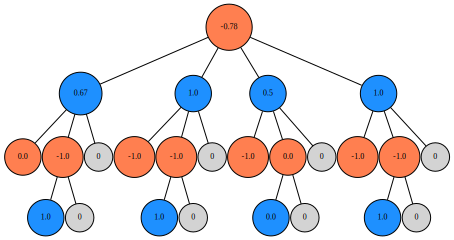

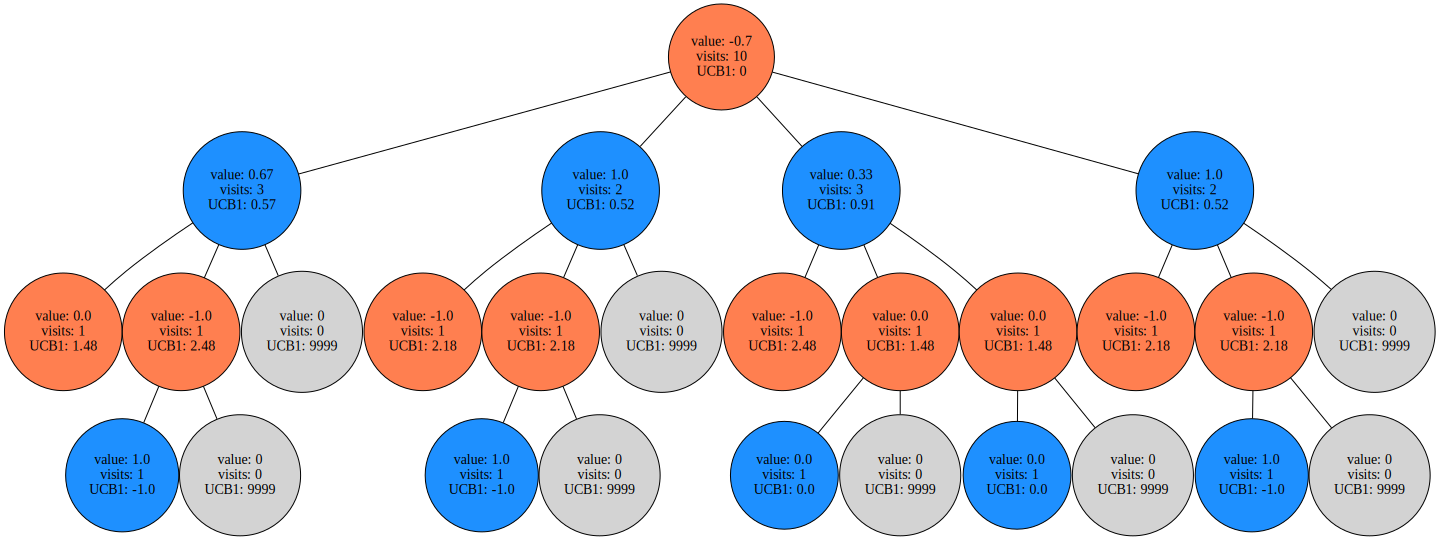

In [298]:
"""
Draw the search tree after each rollout:
- enter "f" to print with full labels
- enter "d" to print nodes as only dots
- enter "q" to end the program
"""
mcts = MCTSPlayer(1, rollouts=1, max_rollout=100)
g = ConnectX()

command = ""
counter = 0
while command != "q" and counter < 10:
    counter += 1
    if command != "c":
        clear_output()
        if mcts.last_state: 
            print("Selected Node:")
            mcts.last_state.drawGame()
        if mcts.last_rollout_state:
            print("Simulation Result:")
            mcts.last_rollout_state.drawGame()
        print("Search Tree:")
        drawTree(mcts)
        command = input()
    mcts.chooseMove(g)
    
drawTree(mcts, True, True)